<h1> Adult Dataset </h1>
<p>The task is to perform exploratory data analysis on the dataset before applying a model to predict the 
income category of the individual</p>

<h2>Part 1 :Exploratory Data Analysis</h2>
This part deals with exploratory data analysis. 
The library used in this section are :
<ul>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
</ul>

In [701]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [702]:
# This cell reads the data from the dataset
df = pd.read_csv("../input/adult-dataset/adult/Dataset.data", sep = " ")

In [703]:
# Renaming columns
df.columns = ["age", "workclass", "fngwgt", "education", "Educational-num","marital status", "occupation"
             ,"relationship", "race","gender", "capital-gain", "capital-loss", "hours-per-week", 
              "native-country", "income"]

In [704]:
df.head()

,age,workclass,fngwgt,education,Educational-num,marital status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [705]:
# Information regarding the dataset including null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48841 non-null  int64 
 1   workclass        48841 non-null  object
 2   fngwgt           48841 non-null  int64 
 3   education        48841 non-null  object
 4   Educational-num  48841 non-null  int64 
 5   marital status   48841 non-null  object
 6   occupation       48841 non-null  object
 7   relationship     48841 non-null  object
 8   race             48841 non-null  object
 9   gender           48841 non-null  object
 10  capital-gain     48841 non-null  int64 
 11  capital-loss     48841 non-null  int64 
 12  hours-per-week   48841 non-null  int64 
 13  native-country   48841 non-null  object
 14  income           48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


<p>It may seem that there is an absence of null values in the data. However, on close analysis, question marks ("?") can be seen. These values must be replaced. Since, nothing can be said about the categorical values, it is better to mark them as "unknown", rather than replacing with a statistically obtained value as that might lead to overfitting.</p>

In [706]:
df.describe()

,age,fngwgt,Educational-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643865,1.896634e+05,10.078152,1079.089720,87.504105,40.422391
std,13.710511,1.056050e+05,2.570961,7452.093748,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781420e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<h3>Categorization</h3>
<p>Since string data is not of much use to us, we categorize it into numeric values that can be processed by the model</p>

In [707]:
def categorize(df, x) :
    df[x], uniques = pd.factorize(df[x])
    return uniques

In [708]:
cat_cols = ["workclass","education", "marital status", "occupation", "relationship", "race", "gender", "native-country", "income"]
maps = {}
for item in cat_cols :
    maps[item] = categorize(df, item)

In [709]:
df.head()

,age,workclass,fngwgt,education,Educational-num,marital status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,0,89814,0,9,0,0,0,0,0,0,0,50,0,0
1,28,1,336951,1,12,0,1,0,0,0,0,0,40,0,1
2,44,0,160323,2,10,0,2,0,1,0,7688,0,40,0,1
3,18,2,103497,2,10,1,3,1,0,1,0,0,30,0,0
4,34,0,198693,3,6,1,4,2,0,0,0,0,30,0,0


<h3>Relationship among data</h3>

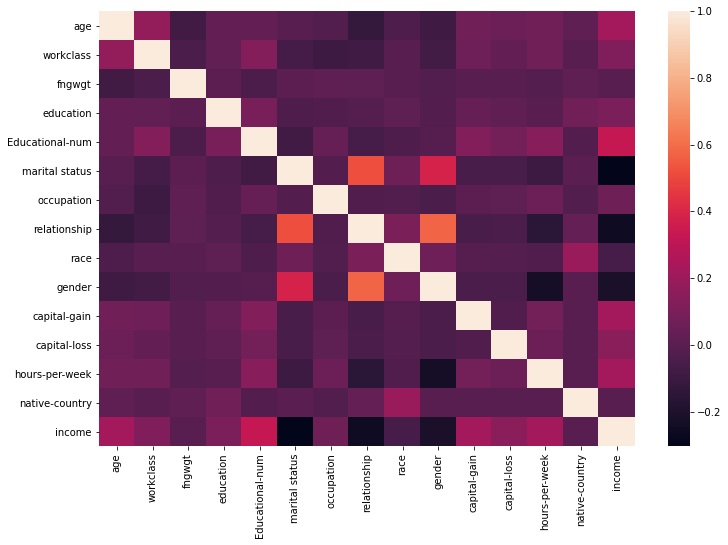

In [710]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr())

<p><ol>
    <li>A high correlation can be seen among relationship and marital status as well as relationship and gender. This may be because marital status is also a kind of relationship.
    </li>
    <li>
        A decent correlation exists between age and income and also educational num and income which seems fairly logical
    </li>
</ol></p>

<h3> Distribution of Data </h3>
<p>We can now take a look at the distribution of data provided in the dataset</p>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f87608c90>,
      dtype=object)

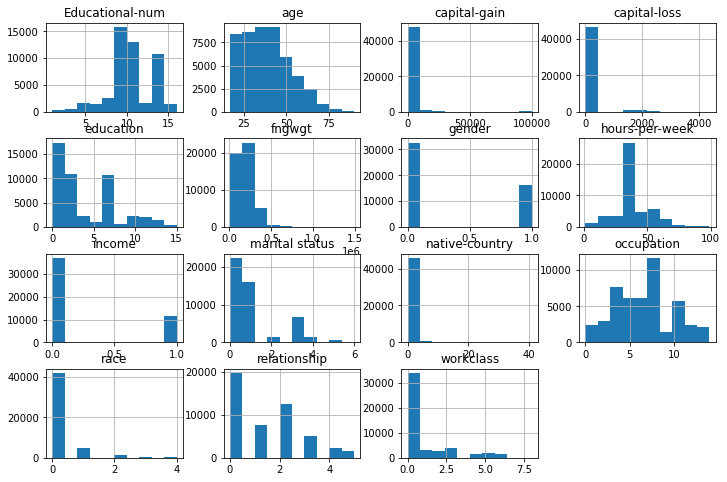

In [711]:
fig, ax = plt.subplots(figsize=(12, 8))
df.hist(ax = ax)

In [712]:
#reference for gender
print("Gender Mappings :")
for index, item in enumerate(maps["gender"]) :
    print(index, item)
print("--------------")
print("Relationship Mappings :")
for index, item in enumerate(maps["relationship"]) :
    print(index, item)
print("--------------")
print("Race Mappings :")
for index, item in enumerate(maps["race"]) :
    print(index, item)
print("--------------")
print("Income Mappings :")
for index, item in enumerate(maps["income"]) :
    print(index, item)
print("--------------")
print("Education Mappings :")
for index, item in enumerate(maps["education"]) :
    print(index, item)
print("--------------")
print("Native Country Mappings :")
for index, item in enumerate(maps["native-country"]) :
    print(index, item)
print("-------------")
print("Marital Status Mappings :")
for index, item in enumerate(maps["marital status"]) :
    print(index, item)
print("-------------")
print("Work Class Mappings :")
for index, item in enumerate(maps["workclass"]) :
    print(index, item)

Gender Mappings :
0 Male
1 Female
--------------
Relationship Mappings :
0 Husband
1 Own-child
2 Not-in-family
3 Unmarried
4 Wife
5 Other-relative
--------------
Race Mappings :
0 White
1 Black
2 Asian-Pac-Islander
3 Other
4 Amer-Indian-Eskimo
--------------
Income Mappings :
0 <=50K
1 >50K
--------------
Education Mappings :
0 HS-grad
1 Assoc-acdm
2 Some-college
3 10th
4 Prof-school
5 7th-8th
6 Bachelors
7 Masters
8 Doctorate
9 11th
10 5th-6th
11 Assoc-voc
12 9th
13 12th
14 1st-4th
15 Preschool
--------------
Native Country Mappings :
0 United-States
1 ?
2 Peru
3 Guatemala
4 Mexico
5 Dominican-Republic
6 Ireland
7 Germany
8 Philippines
9 Thailand
10 Haiti
11 El-Salvador
12 Puerto-Rico
13 Vietnam
14 South
15 Columbia
16 Japan
17 India
18 Cambodia
19 Poland
20 Laos
21 England
22 Cuba
23 Taiwan
24 Italy
25 Canada
26 Portugal
27 China
28 Nicaragua
29 Honduras
30 Iran
31 Scotland
32 Jamaica
33 Ecuador
34 Yugoslavia
35 Hungary
36 Hong
37 Greece
38 Trinadad&Tobago
39 Outlying-US(Guam-USVI-et

<p>
    Let's highlight the different insights we can get from the histograms :
    <ol>
        <li>
            <b>Educational</b> - num - This factors indicates the level of education of the person. From the hstogram, it is clearly visible that most of the people are educated above the level of 9-10.</li>
        <li>
            <b>Age</b> - The number of people of ages below 50 years are almost evenly distributed, after which there is a steady decline in frequency</li>
        <li>
            <b>Capital gain</b> - Most of the people have almost zero capital gain. This fact is also visible in the Data Frames's description a few cells above. (75th percentile has 0 capital gain)</li>
        <li>
            <b>Capital Loss</b> - Same as capital gain. Most have almost zero capital loss.
        </li>
        <li>
            <b>Gender</b> - The number of males is greater than number of females in the data given.
        </li>
        <li>
            <b>Education</b> - The education histograms are similar to education num histograms. So, this redundant field can be removed
        </li>
        <li>
            <b>Native Country</b> - The native country field also adds little value to the dataset as most of the datapoints are from the US. So this can be removed as well.
        </li>
        <li>
            <b>Relationship</b> - It is well spread out among all categories with husband being the most prominent.
        </li>
        <li>
            <b>Occupation</b> - The occupation attribute is well spread out and it shows that the data has been collected from diverse professions
        </li>
        <li>
            <b>Race</b> - The races White and Black dominate in this attribute.
        </li>
        <li>
            <b>Marital Status</b> - Most of the data belongs to people who are married or never married. A significant number are also divorced.
        </li>
        <li>
            <b>Hours per Week</b> - Most of people in the data work approximately 40 hours a week
        </li>
        <li>
            <b>Work Class</b> - Most of the individuals work in the Private sector
        </li>
        <li>
            <b>Income</b> - Most of the income is less than or equal to 50k
        </li>
    </ol>
</p>

<h2>Part 2 : Data Pre-Processing</h2>

In [713]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [714]:
#dropping columns that might cause overfitting dur to high correlation or negligible contribution
df.drop(["capital-loss", "capital-gain", "native-country", "fngwgt", "education"], axis = 1, inplace=True)

In [715]:
#scaling the data to make optimization easier
scaler = StandardScaler()

In [716]:
X = df[df.columns[:-1]]
Y = df["income"]
X = scaler.fit_transform(X)

In [717]:
# The split ratio will be 4 : 1 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

<h3>Utility Functions</h3>
<p>Since the task is that of binary classification, we will need metrics like precision and recall for model evaluation</p>

In [718]:
def util(Y, Y_pred) :
    Y = list(Y)
    Y_pred = list(Y_pred)
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(Y)) :
        if Y[i] == 1 and Y[i] == Y_pred[i] :
            tp += 1
        elif Y[i] == 1 :
            fn += 1
        elif Y[i] == 0 and Y[i] == Y_pred[i] :
            tn += 1
        else :
            fp += 1
    return tp, tn, fp, fn

def precision(tp, fp) :
    return tp / (tp + fp)

def recall(tp, fn) :
    return tp / (fn + tp)

<h2>Part 3 : Fitting the Model</h2>
<p>We will now fit the data in a model developed in Keras</p>

In [719]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [720]:
model = Sequential()
model.add(Dense(512, activation= "relu", bias_regularizer = l2(0.5)))
model.add(Dense(256, activation = "relu", kernel_regularizer = l2(0.01)))
model.add(Dropout(0.6))
model.add(Dense(128, activation = "relu", kernel_regularizer = l2(0.01)))
model.add(Dense(64, activation = "relu", kernel_regularizer = l2(0.08)))
model.add(Dropout(0.6))
model.add(Dense(32, activation = "relu", kernel_regularizer = l2(0.08)))
model.add(Dense(16, activation = "relu", kernel_regularizer = l2(0.001)))
model.add(Dense(8, activation = "relu", kernel_regularizer = l2(0.001)))
model.add(Dense(1, activation = "sigmoid", kernel_regularizer = l2(0.02)))

In [721]:
lr_schedule = ExponentialDecay(
    initial_learning_rate= 0.00001,
    decay_steps=100000,
    decay_rate=9)
optimizer = Adam(learning_rate = lr_schedule)

In [722]:
model.compile(loss = "binary_crossentropy", optimizer=optimizer,metrics=["acc"])

In [723]:
history = model.fit(X_train,Y_train, validation_split=0.3, epochs=100)

Epoch 1/100
855/855 [==============================] - 4s 4ms/step - loss: 14.8635 - acc: 0.7244 - val_loss: 13.6913 - val_acc: 0.7593
Epoch 2/100
855/855 [==============================] - 4s 4ms/step - loss: 12.6137 - acc: 0.7613 - val_loss: 11.5905 - val_acc: 0.7593
Epoch 3/100
855/855 [==============================] - 4s 5ms/step - loss: 10.6402 - acc: 0.7614 - val_loss: 9.7446 - val_acc: 0.7593
Epoch 4/100
855/855 [==============================] - 4s 4ms/step - loss: 8.9320 - acc: 0.7614 - val_loss: 8.1678 - val_acc: 0.7593
Epoch 5/100
855/855 [==============================] - 4s 4ms/step - loss: 7.4817 - acc: 0.7614 - val_loss: 6.8261 - val_acc: 0.7593
Epoch 6/100
855/855 [==============================] - 4s 5ms/step - loss: 6.2381 - acc: 0.7614 - val_loss: 5.6764 - val_acc: 0.7593
Epoch 7/100
855/855 [==============================] - 4s 5ms/step - loss: 5.1743 - acc: 0.7614 - val_loss: 4.6969 - val_acc: 0.7593
Epoch 8/100
855/855 [==============================] - 4s 4ms/st

855/855 [==============================] - 4s 4ms/step - loss: 0.4549 - acc: 0.8306 - val_loss: 0.4529 - val_acc: 0.8248
Epoch 63/100
855/855 [==============================] - 4s 5ms/step - loss: 0.4528 - acc: 0.8301 - val_loss: 0.4523 - val_acc: 0.8257
Epoch 64/100
855/855 [==============================] - 4s 5ms/step - loss: 0.4521 - acc: 0.8314 - val_loss: 0.4522 - val_acc: 0.8237
Epoch 65/100
855/855 [==============================] - 4s 5ms/step - loss: 0.4526 - acc: 0.8320 - val_loss: 0.4514 - val_acc: 0.8256
Epoch 66/100
855/855 [==============================] - 4s 5ms/step - loss: 0.4514 - acc: 0.8307 - val_loss: 0.4510 - val_acc: 0.8238
Epoch 67/100
855/855 [==============================] - 4s 4ms/step - loss: 0.4503 - acc: 0.8304 - val_loss: 0.4502 - val_acc: 0.8249
Epoch 68/100
855/855 [==============================] - 4s 5ms/step - loss: 0.4510 - acc: 0.8311 - val_loss: 0.4498 - val_acc: 0.8242
Epoch 69/100
855/855 [==============================] - 4s 5ms/step - loss:

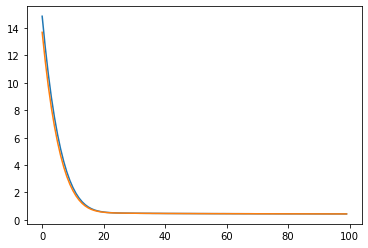

In [724]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

<p>Note that the training and validation loss are almost same which essentially implies that the model is a perfect fit, i.e, it does not overfit, nor does it underfit the data</p>

In [729]:
preds = model.predict(X_test)
preds = preds > 0.5
preds = preds.astype(int)
tp, tn, fp, fn = util(Y_test, preds)
print("Precision", precision(tp, fp))
print("Recall", recall(tp, fn))

Precision 0.664966853646099
Recall 0.5572649572649573
